# Machine Learning on joined dataset
This notebook follows a similar structure as part 6: Machine Learning on original (clean) dataset 

In [24]:
# Data tools
import pandas as pd
import numpy as np
# Graph Tools
import matplotlib.pyplot as plt
import seaborn as sns
# File tools
from joblib import dump, load
# Sstatistics and machine learning tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

## Importing data and preparing it for ML

In [3]:
# Import cleaned data
df = pd.read_csv("joined_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  ...  room_type_Shared room  number_of_places_2500m  \
0    149  ...                    0.0                       8   
1    225  ...                    0.0                      75   

  number_of_places_1000m  number_of_places_500m  number_of_rats_2500m  \
0                      0                      0                   456   
1                     29                      4                   448   

   number_of_rats_1000m number_of_rats_500m  number_of_trees_2500m  \
0                    57                   8                   5491   
1                    54                   5                   3611   

   number_of_trees_1000m  number_of_trees_500m  
0                   1037                   321  
1                    296                    46  

[2 rows x 35 columns]

In [4]:
# Manage Na values in dataframe
df.isna().sum()

id                                      0
name                                   15
host_id                                 0
host_name                              21
neighbourhood_group                     0
neighbourhood                           0
latitude                                0
longitude                               0
room_type                               0
price                                   0
minimum_nights                          0
number_of_reviews                       0
last_review                          9913
reviews_per_month                    9913
calculated_host_listings_count          0
availability_365                        0
neighbourhood_other                     0
neighbourhood_other_label               0
neighbourhood_group_Bronx               0
neighbourhood_group_Brooklyn            0
neighbourhood_group_Manhattan           0
neighbourhood_group_Queens              0
neighbourhood_group_Staten Island       0
room_type_Entire home/apt         

In [5]:
print(df[df['last_review'].isna()].groupby('number_of_reviews').size())
print(df[df['reviews_per_month'].isna()].groupby('number_of_reviews').size())

number_of_reviews
0    9913
dtype: int64
number_of_reviews
0    9913
dtype: int64


In [6]:
df['last_review'] = df['last_review'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

### Making datasets for the machine learning algorithm

In [9]:
# Display the possible features of the dataframe
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_other', 'neighbourhood_other_label',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'number_of_places_2500m', 'number_of_places_1000m',
       'number_of_places_500m', 'number_of_rats_2500m', 'number_of_rats_1000m',
       'number_of_rats_500m', 'number_of_trees_2500m', 'number_of_trees_1000m',
       'number_of_trees_500m'],
      dtype='object')

In [10]:
# Choose which features not to include in the calculation estimating price.
features = df.drop(['price',
                    'id', 
                    'name', 
                    'host_id', 
                    'host_name', 
                    'neighbourhood_group',
                    'neighbourhood', 
                    'room_type',
                    'last_review',
                    'neighbourhood_other'], axis=1)
target = df.price
# Print the chosen features
print(features.columns)

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_other_label',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'number_of_places_2500m', 'number_of_places_1000m',
       'number_of_places_500m', 'number_of_rats_2500m', 'number_of_rats_1000m',
       'number_of_rats_500m', 'number_of_trees_2500m', 'number_of_trees_1000m',
       'number_of_trees_500m'],
      dtype='object')


## Baseline model linear regression

In [11]:
# Scaling data since linear regression works better on scaled data
scaler = StandardScaler()
base_features = scaler.fit_transform(features)

# To do regression we first need to make a sample of our data to make the regression analysis on, and the a seperate chunk of data to test that analysis on.
test_fraction = 0.2 # We chose to keep 20% of the dataset seperate to test the regression we make

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(base_features, target, test_size = test_fraction, random_state=3546)
#Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 25) 	Testing Features Shape:	 (9743, 25)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [12]:
# Make a prediction of price via linear regression
reg_lin = LinearRegression().fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)
print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Mean absolute error (on test data): 75.0061


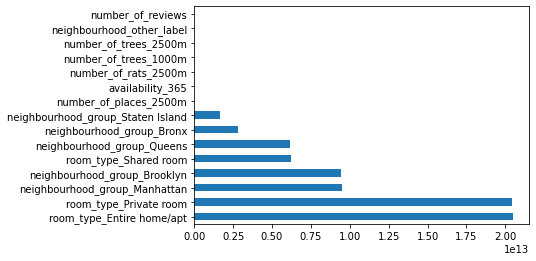

In [13]:
# Show the features most important in making the prediction above 
pd.Series(np.abs(reg_lin.coef_), index=features.columns).nlargest(15).plot(kind='barh')
plt.show()

On this dataset the baseline model had a Mean Absolute Error of 75.0 which in an improvement of 4.4 over the baseline model on the dataset without the nine features extracted from the additional datasets.

## Decision Tree

In [14]:
# Just like with the linear regression above we set aside 20% of the dataset for testing.
test_fraction = 0.2

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = test_fraction, random_state=3546)
# Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 25) 	Testing Features Shape:	 (9743, 25)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [15]:
parameters = {'criterion':('mse', 'poisson'), 'max_depth':[1, 5, 10, 15, 20]} #'friedman_mse' gives same results as mse, mae is 60 times slower then mse and poisson

reg_tree = DecisionTreeRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_tree, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=3546),
             param_grid={'criterion': ('mse', 'poisson'),
                         'max_depth': [1, 5, 10, 15, 20]},
             scoring='neg_mean_absolute_error')

In [16]:
df_reg_tree = pd.DataFrame(reg_seach.cv_results_).sort_values('rank_test_score')
df_reg_tree.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.222595      0.013918         0.005324        0.000751   
2       0.426247      0.036327         0.005689        0.000299   

  param_criterion param_max_depth                                 params  \
1             mse               5   {'criterion': 'mse', 'max_depth': 5}   
2             mse              10  {'criterion': 'mse', 'max_depth': 10}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
1         -71.104836         -72.586450         -72.870387         -71.600404   
2         -73.799395         -71.663951         -74.247974         -70.592263   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
1         -71.373405       -71.907096        0.694544                1  
2         -70.610864       -72.182889        1.558738                2

In [32]:
reg_tree_best = reg_seach.best_estimator_
y_pred = reg_tree_best.predict(X_test)

print(f'Decision tree has {reg_tree_best.tree_.node_count} nodes with maximum depth {reg_tree_best.tree_.max_depth}.')
print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Decision tree has 59 nodes with maximum depth 5.
Mean absolute error (on test data): 73.2438


In [30]:
# Display tree
# fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(25,20), dpi=300)
# plot_tree(reg_tree_best, feature_names=features.columns, filled = True)
# fig.savefig('imagename.jpeg')

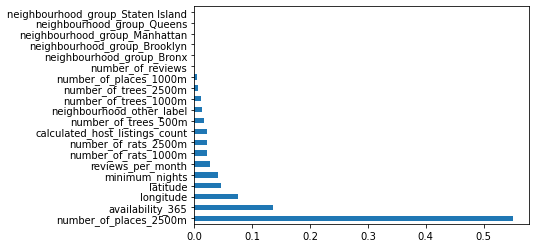

In [33]:
# Again we see the features of the regression displayd by relevans
pd.Series(reg_tree_best.feature_importances_, index=features.columns).nlargest(20).plot(kind='barh')
plt.show()

By using a decision tree we have been able to cut the Mean Absolute Error from approximately 75.0 down to 73.2 by dividing the dataset into 59 smaller nodes before doing the regression. This is however, a worse performance than the decision tree trained on the other dataset which had a Mean Absolute Eror of 71.0.

## Random Forest

In [34]:
test_fraction = 0.2

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = test_fraction, random_state=3546)
#Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 25) 	Testing Features Shape:	 (9743, 25)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [35]:
# This is where the random forest differs from simple decision tree. We ensemble up to 200 trees to find the best tree to continue with.
parameters = {'n_estimators':[10, 50, 100, 150, 200], 'criterion':('mse',), 'max_depth':[10, 20, None]} # mae is again more than 60 times slower than mse

reg_forest = RandomForestRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_forest, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=3546),
             param_grid={'criterion': ('mse',), 'max_depth': [10, 20, None],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [37]:
# Cross validate and sort by highest score 
df_reg_forest = pd.DataFrame(reg_seach.cv_results_).sort_values('rank_test_score')
df_reg_forest.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      63.326787      8.350181         0.246816        0.018613   
3      42.833217      2.964270         0.180167        0.033986   

  param_criterion param_max_depth param_n_estimators  \
4             mse              10                200   
3             mse              10                150   

                                              params  split0_test_score  \
4  {'criterion': 'mse', 'max_depth': 10, 'n_estim...         -67.041381   
3  {'criterion': 'mse', 'max_depth': 10, 'n_estim...         -67.062900   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4         -67.955912         -68.649789         -67.086198         -67.183769   
3         -67.981031         -68.638530         -67.115843         -67.145134   

   mean_test_score  std_test_score  rank_test_score  
4       -67.583410        0.628753                1  
3       -67.588688        0.624960                2

In [38]:
reg_forest_best = reg_seach.best_estimator_
y_pred = reg_forest_best.predict(X_test)

print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Mean absolute error (on test data): 69.0997


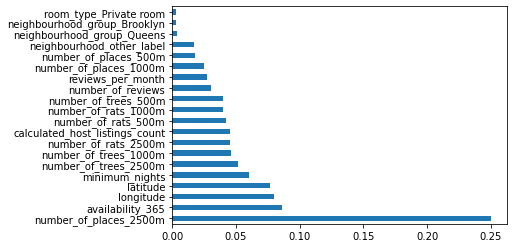

In [39]:
pd.Series(reg_forest_best.feature_importances_, index=features.columns).nlargest(20).plot(kind='barh')
plt.show()

By using a Random Forest we have been able to cut the Mean Absolute Error down just a bit further to around 69.1. This is however, again just a bit worse than than the performance of the first random forest fitted on the other dataset. (Which had a MAE of 68.6.)

## Random Forest with feature selection

In [ ]:
# Here we display featues of our random forest and the threshold for when we consider a feature unimportant
df_reg_forest_feat_im = pd.Series(reg_forest_best.feature_importances_, index=features.columns).nlargest(20)
# Threshold of (un)importance
threshold_feat_im = 0.005


threshold_plot = len(df_reg_forest_feat_im[df_reg_forest_feat_im>=threshold_feat_im])-0.5

df_reg_forest_feat_im.plot(kind='barh')
plt.axhline(y=threshold_plot,linewidth=1, color='orange')
plt.show()

In [41]:
# Choose which featues not to include in the calculation
features_select = features.drop(df_reg_forest_feat_im[df_reg_forest_feat_im<threshold_feat_im].index, axis=1)
target = df.price

print(features_select.columns)

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_other_label',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Shared room', 'number_of_places_2500m',
       'number_of_places_1000m', 'number_of_places_500m',
       'number_of_rats_2500m', 'number_of_rats_1000m', 'number_of_rats_500m',
       'number_of_trees_2500m', 'number_of_trees_1000m',
       'number_of_trees_500m'],
      dtype='object')


In [42]:
test_fraction = 0.2

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(features_select, target, test_size = test_fraction, random_state=3546)
#Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 22) 	Testing Features Shape:	 (9743, 22)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [43]:
parameters = {'n_estimators':[10, 50, 100, 150, 200], 'criterion':('mse',), 'max_depth':[10, 20, None]} # mae is again more than 60 times slower than mse

reg_forest_select = RandomForestRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_forest_select, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=3546),
             param_grid={'criterion': ('mse',), 'max_depth': [10, 20, None],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [44]:
df_reg_forest_select = pd.DataFrame(reg_seach.cv_results_).sort_values('rank_test_score')
df_reg_forest_select.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      44.050027      3.481482         0.220304        0.037563   
3      34.568878      1.781484         0.155194        0.016202   

  param_criterion param_max_depth param_n_estimators  \
4             mse              10                200   
3             mse              10                150   

                                              params  split0_test_score  \
4  {'criterion': 'mse', 'max_depth': 10, 'n_estim...         -67.031876   
3  {'criterion': 'mse', 'max_depth': 10, 'n_estim...         -67.047618   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4         -67.894591         -68.587952         -67.103827         -67.156102   
3         -67.901288         -68.558159         -67.129507         -67.156835   

   mean_test_score  std_test_score  rank_test_score  
4       -67.554869        0.603100                1  
3       -67.558681        0.587059                2

In [45]:
reg_forest_select_best = reg_seach.best_estimator_
y_pred = reg_forest_select_best.predict(X_test)

print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Mean absolute error (on test data): 69.069


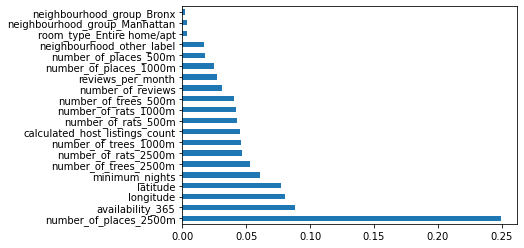

In [46]:
pd.Series(reg_forest_select_best.feature_importances_, index=features_select.columns).nlargest(20).plot(kind='barh')
plt.show()

As can be seen feature selection did not do a lot of diffrence to the Random Forest model as our Mean Absolute Error did only change in the second decimal place. Thus, the model with the best performance was the Random Forest with feature selection fitted on the original dataset. Therefore the model used on the website did not use any of the nine features extracted from the three additional datasets. 